### Required Modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
df = pd.read_csv("../data/train_2.csv")

In [3]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10'],
      dtype='object', length=804)

In [4]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.415430e+05,1.413870e+05,1.413460e+05,1.418680e+05,1.424060e+05,1.432880e+05,1.415960e+05,1.440020e+05,1.417310e+05,1.394850e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.036314e+03,1.024713e+03,1.174865e+03,1.175681e+03,1.138931e+03,1.202851e+03,1.276387e+03,9.496720e+02,9.338783e+02,1.017055e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,4.999129e+04,5.713222e+04,6.743460e+04,6.915052e+04,6.646815e+04,6.386384e+04,6.726099e+04,5.048330e+04,4.536524e+04,5.704368e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.100000e+01,1.900000e+01,1.900000e+01,1.800000e+01,1.800000e+01,1.800000e+01,2.300000e+01,1.800000e+01,1.800000e+01,1.800000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.250000e+02,1.260000e+02,1.320000e+02,1.230000e+02,1.210000e+02,1.190000e+02,1.365000e+02,1.150000e+02,1.200000e+02,1.250000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,5.090000e+02,5.140000e+02,5.610000e+02,5.360000e+02,5.300000e+02,5.320000e+02,5.760000e+02,5.040000e+02,5.160000e+02,5.480000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,1.372256e+07,1.578888e+07,1.856151e+07,1.906250e+07,1.839517e+07,1.749919e+07,1.827305e+07,1.411666e+07,1.269626e+07,1.573111e+07


In [5]:
split_page = df['Page'].str.replace("^(.*)_([^_.]{2,})\.(wikipedia|wikimedia|mediawiki)\.org_([^_]*)_([^_]*)", r"\1___\2___\3___\4___\5").str.split("___", expand=True)
split_page.head()

,0,1,2,3,4
0,2NE1,zh,wikipedia,all-access,spider
1,2PM,zh,wikipedia,all-access,spider
2,3C,zh,wikipedia,all-access,spider
3,4minute,zh,wikipedia,all-access,spider
4,52_Hz_I_Love_You,zh,wikipedia,all-access,spider


In [6]:
split_page.columns = ["title", "language", "host", "platform", "isRobot"]
split_page.head()

,title,language,host,platform,isRobot
0,2NE1,zh,wikipedia,all-access,spider
1,2PM,zh,wikipedia,all-access,spider
2,3C,zh,wikipedia,all-access,spider
3,4minute,zh,wikipedia,all-access,spider
4,52_Hz_I_Love_You,zh,wikipedia,all-access,spider


In [7]:
df[["title", "language", "host", "platform", "isRobot"]] = df['Page'].str.replace("^(.*)_([^_.]{2,})\.(wikipedia|wikimedia|mediawiki)\.org_([^_]*)_([^_]*)", r"\1___\2___\3___\4___\5").str.split("___", expand=True)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,language,host,platform,isRobot
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,27.0,29.0,23.0,54.0,38.0,2NE1,zh,wikipedia,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,25.0,26.0,23.0,13.0,81.0,2PM,zh,wikipedia,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,3.0,4.0,7.0,6.0,3C,zh,wikipedia,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,19.0,30.0,38.0,4.0,4minute,zh,wikipedia,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh,wikipedia,all-access,spider


In [12]:
df.shape

(145063, 809)

In [8]:
melted_df = pd.melt(df, id_vars=['Page'], var_name="Date", value_name="Value")
melted_df.head()

,Page,Date,Value
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [10]:
melted_df['Page'].str.contains("_[A-Za-z]{2}.wikipedia").all()

False

In [11]:
melted_df[~melted_df['Page'].str.contains("_[A-Za-z]{2}.wikipedia")].head()

,Page,Date,Value
13332,Accueil_commons.wikimedia.org_all-access_spider,2015-07-01,55
13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,2015-07-01,5
13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,2015-07-01,4
13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,2015-07-01,5
13336,Atlas_of_colonialism_commons.wikimedia.org_all...,2015-07-01,8


In [12]:
melted_df[~melted_df['Page'].str.contains("_([^_.]{2,})\.(wikipedia|wikimedia|mediawiki)\.org.*")].head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,Page,Date,Value


In [ ]:
melted_df[~melted_df['Page'].str.contains("_([^_.]{2,})\.(wikipedia|wikimedia|mediawiki)\.org.*")].count()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


Page     0
Date     0
Value    0
dtype: int64

In [ ]:
split_page = melted_df['Page'].str.replace("^(.*)_([^_.]{2,})\.(wikipedia|wikimedia|mediawiki)\.org_([^_]*)_([^_]*)", r"\1___\2___\3___\4___\5").str.split("___", expand=True)
split_page.head()

In [ ]:
melted_df.head()

In [31]:
tmp = melted_df.head(100000)['Page'].str.replace("^(.*)_([^_.]{2,})\.(wikipedia|wikimedia|mediawiki)\.org_([^_]*)_([^_]*)", r"\1___\2___\3___\4___\5").str.split("___", expand=True)

tmp.head()

,0,1,2,3,4
0,2NE1,zh,wikipedia,all-access,spider
1,2PM,zh,wikipedia,all-access,spider
2,3C,zh,wikipedia,all-access,spider
3,4minute,zh,wikipedia,all-access,spider
4,52_Hz_I_Love_You,zh,wikipedia,all-access,spider


In [32]:
tmp[2].unique()

array(['wikipedia', 'wikimedia', 'mediawiki'], dtype=object)

In [9]:
melted2 = melted_df[melted_df['Page'].str.contains("_[A-Za-z]{2}.wikipedia")]

In [10]:
melted2['title'] = melted2['Page'].str.replace("_([A-Za-z]{2}).wikipedia.org.*", r"___\1").str.split("___").apply(lambda x: x[0])

KeyboardInterrupt: 

In [12]:
melted2['Page'].head().str.replace("_([^_.]{2,})\.wiki(pedia|media)\.org.*", r"___\1").str.split("___", expand=True)

,0,1
0,2NE1,zh
1,2PM,zh
2,3C,zh
3,4minute,zh
4,52_Hz_I_Love_You,zh


In [7]:
melted2['language'] = melted2['Page'].str.replace("_([A-Za-z]{2}).wikipedia.org.*", r"___\1").str.split("___").apply(lambda x: x[1])

IndexError: list index out of range

In [ ]:
melted2['Page'].str.replace("_([A-Za-z]{2}).wikipedia.org.*", r"___\1").str.split("___").apply(lambda x: len(x))

In [ ]:
melted2['platform'] = melted2['Page'].str.replace(".*.wikipedia.org_(.*)", r"\1").str.split("_").apply(lambda x: x[0])

In [ ]:
melted2['isRobot'] = melted2['Page'].str.replace(".*.wikipedia.org_(.*)", r"\1").str.split("_").apply(lambda x: int(x[1]=="spider"))

In [113]:
# drop page colum
#del melted_df['Page']

In [ ]:
melted_df.shape

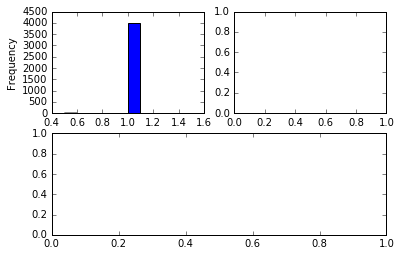

In [144]:
ax = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
melted2['isRobot'].plot(kind="hist",ax=ax1)

ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)


In [ ]:
ax.plot(kind='hist')